In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import cv2

In [2]:
def read_binary_image(filename, size):
    """Read a binary image from a file."""
    with open(filename, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint8)
    return image.reshape((size, size))

def display_images(images, titles):
    """Display and save images."""
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

def save_an_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close() 

def save_images(images, filename_prefix):
    """Lưu danh sách hình ảnh với tên cụ thể."""
    names = ['original', 'median_filtered', 'opened', 'closed']
    for data, name in zip(images, names):
        # Ghép tên tệp với phần tiền tố và hậu tố
        filename = f"{filename_prefix}_{name}.png"
        save_an_image(data, filename)

In [3]:
def apply_median_filter(image, window_size):
    """Apply a median filter to the image."""
    filtered = median_filter(image, size=window_size)
    # Set border pixels to 0
    filtered[:window_size//2, :] = 0
    filtered[-window_size//2:, :] = 0
    filtered[:, :window_size//2] = 0
    filtered[:, -window_size//2:] = 0
    return filtered

def erode(image, kernel_size):
    """Apply erosion using a square kernel."""
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    eroded = cv2.erode(image, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=0)
    return eroded

def dilate(image, kernel_size):
    """Apply dilation using a square kernel."""
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    dilated = cv2.dilate(image, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=0)
    return dilated

def morphological_open(image, kernel_size):
    """Apply morphological opening (erosion followed by dilation)."""
    eroded = erode(image, kernel_size)
    return dilate(eroded, kernel_size)

def morphological_close(image, kernel_size):
    """Apply morphological closing (dilation followed by erosion)."""
    dilated = dilate(image, kernel_size)
    return erode(dilated, kernel_size)

def process_image(filename, size, window_size):
    # Read input image
    original_image = read_binary_image(filename, size)

    # Apply filters
    median_filtered = apply_median_filter(original_image, window_size)
    opened = morphological_open(original_image, window_size)
    closed = morphological_close(original_image, window_size)

    # Return all results
    return original_image, median_filtered, opened, closed

In [4]:
size = 256
window_size = 3

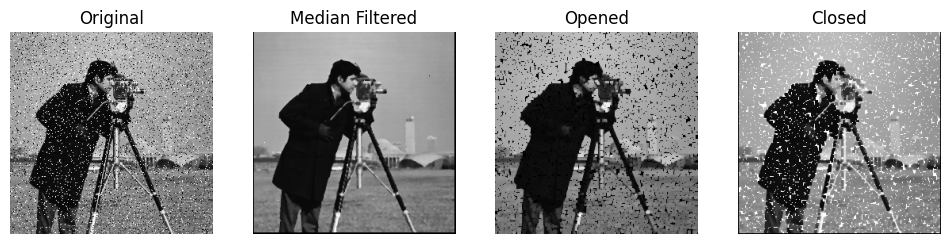

In [5]:
file = '../data/camera9bin.sec'
original, median_filtered, opened, closed = process_image(file, size, window_size)
images = [original, median_filtered, opened, closed]
titles = ['Original', 'Median Filtered', 'Opened', 'Closed']
display_images(images, titles)
save_images(images, "camera9")

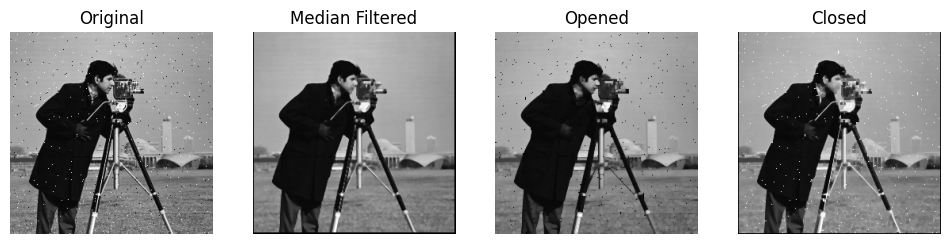

In [6]:
file = '../data/camera99bin.sec'
original, median_filtered, opened, closed = process_image(file, size, window_size)
images = [original, median_filtered, opened, closed]
titles = ['Original', 'Median Filtered', 'Opened', 'Closed']
display_images(images, titles)
save_images(images, "camera99")

In [7]:
# Khi so sánh các phép toán:

# Lọc trung vị:
# Loại bỏ hầu hết nhiễu muối tiêu (salt-and-pepper) mà không làm thay đổi biên của đối tượng.

# Mở hình thái:
# Loại bỏ các nhiễu nhỏ và làm mịn biên của đối tượng.
# Tuy nhiên, có thể làm mất các chi tiết nhỏ trong ảnh.

# Đóng hình thái:
# Làm kín các vùng đứt gãy hoặc nhiễu trong biên của đối tượng.
# Thường làm dày các vùng sáng hơn.